# Import Dependeces

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Dataset link: https://archive.ics.uci.edu/dataset/53/iris

# 1. Data Preprocessing:

Load the dataset and convert it into a DataFrame with appropriate column names.

In [4]:
# Define the column names for the Iris dataset
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load the dataset from the UCI link
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Read the dataset into a DataFrame
iris_df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Check them any missing values and handle them appropriately.

In [8]:
missing_values = iris_df.isnull().sum()
missing_values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Standardize the numerical features (sepal_length, sepal_width, petal_length, petal_width) using StandardScaler from sklearn.

In [9]:
# Select numerical features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
iris_df[features] = scaler.fit_transform(iris_df[features])

# Display the first few rows of the standardized data
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa


# Exploratory Data Analysis (EDA):

compute summary statistics (mean, median, variance) for each feature, grouped by species.

In [10]:
# Compute summary statistics grouped by species
summary_stats = iris_df.groupby('species').agg({
    'sepal_length': ['mean', 'median', 'var'],
    'sepal_width': ['mean', 'median', 'var'],
    'petal_length': ['mean', 'median', 'var'],
    'petal_width': ['mean', 'median', 'var']
})

# Display the summary statistics
summary_stats


sepal_length                     sepal_width            \
                        mean    median       var        mean    median   
species                                                                  
Iris-setosa        -1.014579 -1.021849  0.182418    0.842307  0.800654   
Iris-versicolor     0.112282  0.068662  0.391167   -0.657184 -0.587764   
Iris-virginica      0.902297  0.795669  0.593642   -0.185122 -0.124958   

                          petal_length                     petal_width  \
                      var         mean    median       var        mean   
species                                                                  
Iris-setosa      0.777398    -1.304878 -1.284407  0.009735   -1.255129   
Iris-versicolor  0.527277     0.285087  0.336266  0.071406    0.167409   
Iris-virginica   0.556914     1.019792  1.018654  0.098495    1.087720   

                                     
                   median       var  
species                              
Iris-setosa     -1.312977  0.019867  
Iris-versicolor  0.133226  0.067595  
Iris-virginica   1.053537  0.130386

Plot a box for each feature, separated by species.

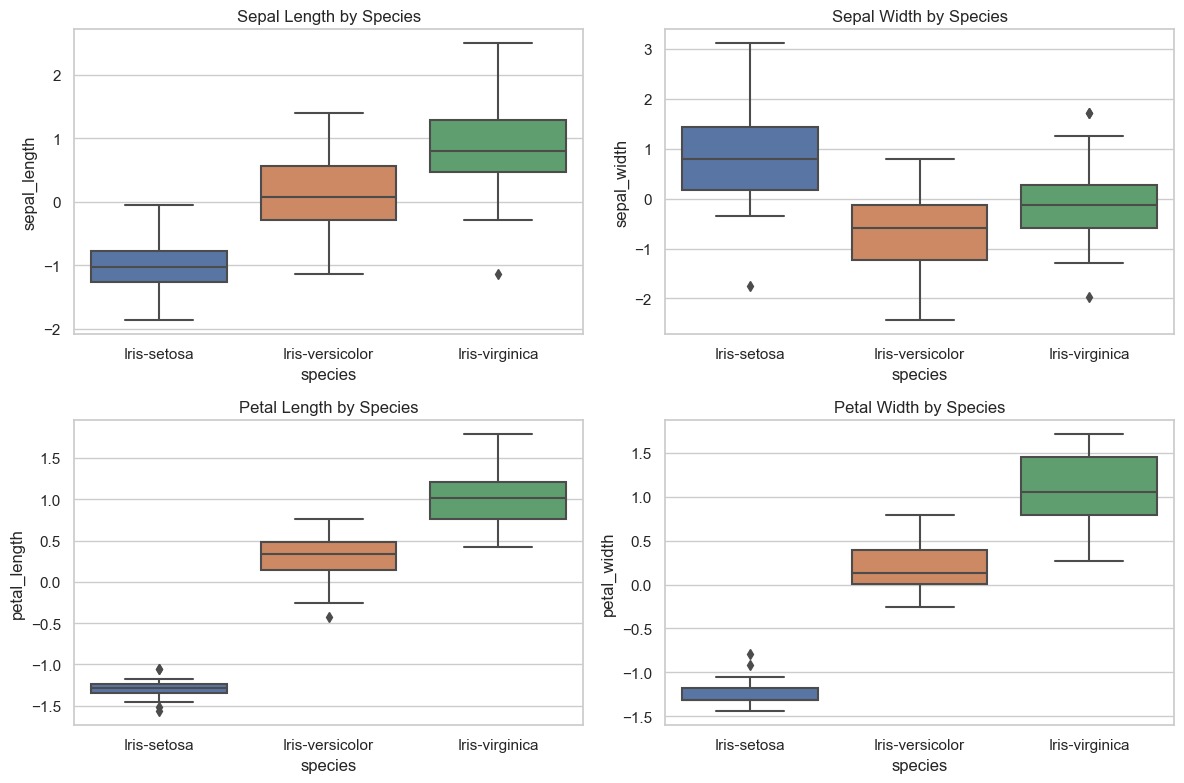

In [11]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create box plots for each feature, separated by species
sns.boxplot(x='species', y='sepal_length', data=iris_df, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length by Species')

sns.boxplot(x='species', y='sepal_width', data=iris_df, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width by Species')

sns.boxplot(x='species', y='petal_length', data=iris_df, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length by Species')

sns.boxplot(x='species', y='petal_width', data=iris_df, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width by Species')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Create a violin plot to show the distribution of petal_length for each species.

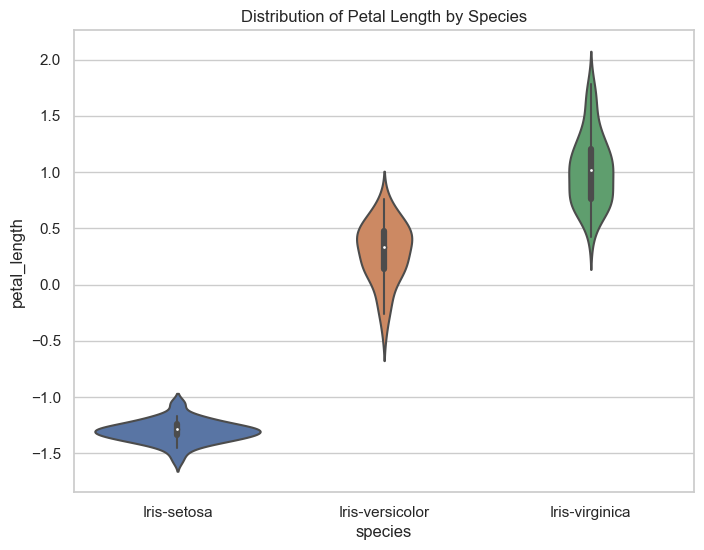

In [12]:

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a violin plot for petal_length, separated by species
sns.violinplot(x='species', y='petal_length', data=iris_df)

# Add title
plt.title('Distribution of Petal Length by Species')

# Show the plot
plt.show()


# Data Visualization:

Create a scatter plot of sepal_length vs sepal_width, colored by specifies.

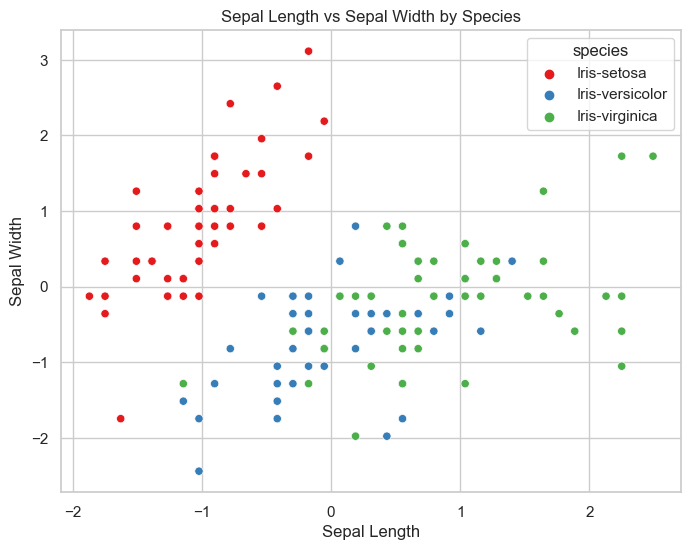

In [13]:

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot for sepal_length vs sepal_width, colored by species
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df, palette='Set1')

# Add title and labels
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Show the plot
plt.show()


Create a pair plot (using seaborn) to visualize the relationship between all numerical features, colored by specifies.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


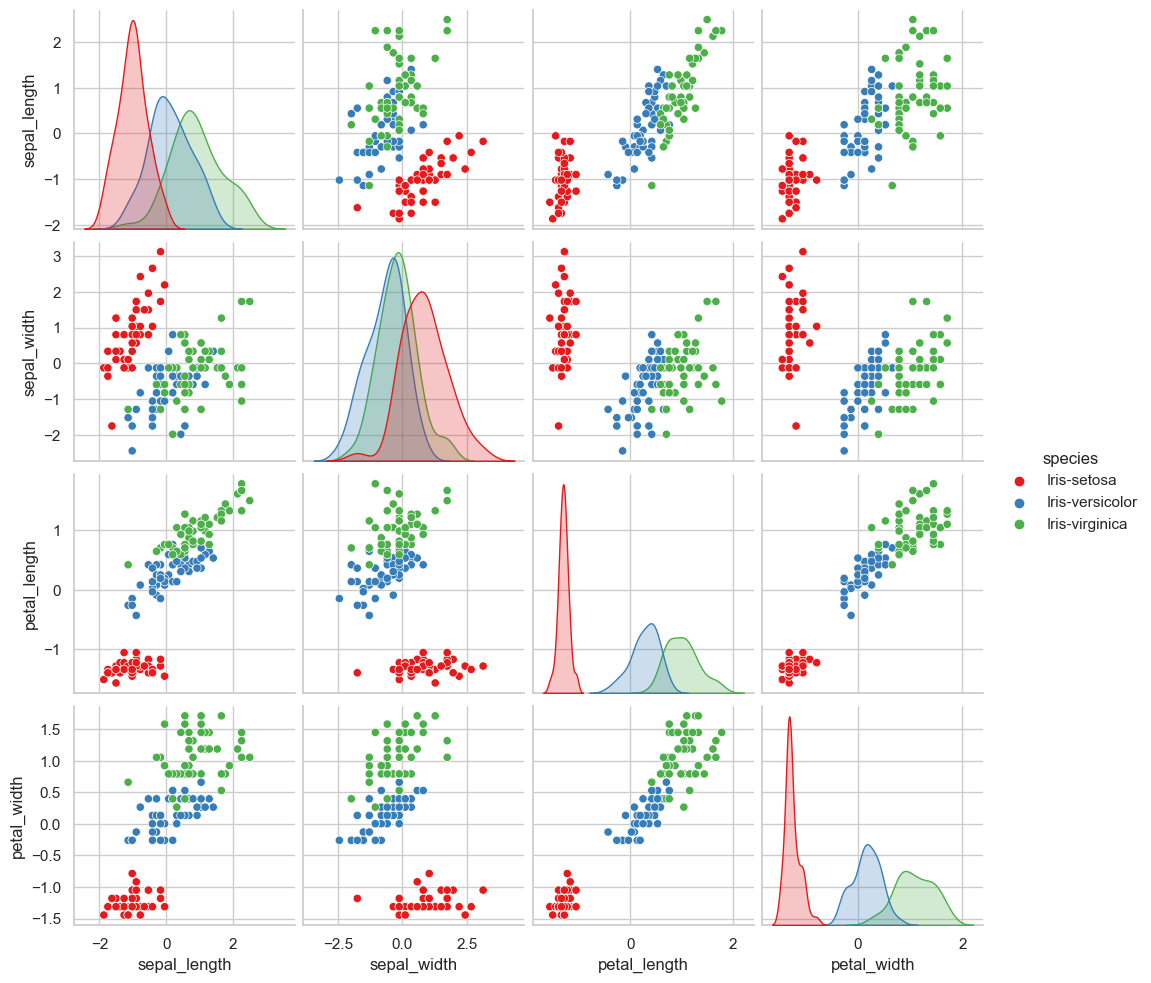

In [14]:

# Create a pair plot for all numerical features, colored by species
sns.pairplot(iris_df, hue='species', palette='Set1')

# Show the plot
plt.show()


# Class Distribution:

Count the number of samples for each specifies and display the distribution in a bar plot. 

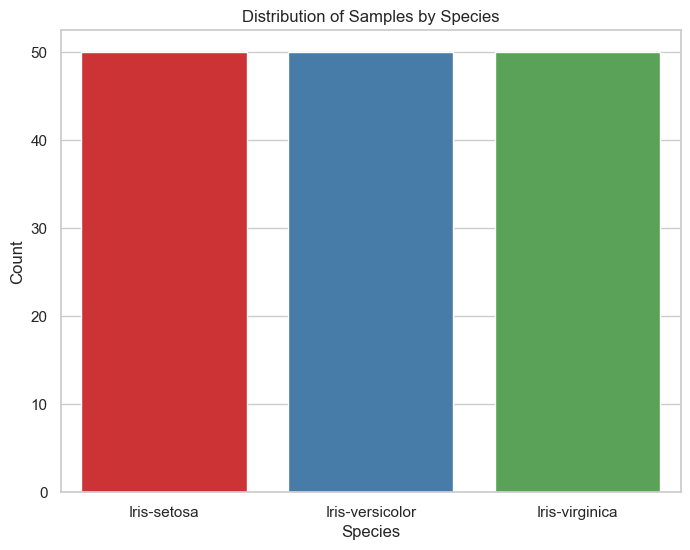

In [15]:

# Count the number of samples for each species
species_count = iris_df['species'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a bar plot to show the distribution of samples for each species
sns.barplot(x=species_count.index, y=species_count.values, palette='Set1')

# Add title and labels
plt.title('Distribution of Samples by Species')
plt.xlabel('Species')
plt.ylabel('Count')

# Show the plot
plt.show()


Calculate the percentage distribution of each species in the dataset.

In [16]:
# Calculate the percentage distribution of each species
species_percentage = iris_df['species'].value_counts(normalize=True) * 100

# Display the percentage distribution
print(species_percentage)


species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: proportion, dtype: float64


# 5. Correlation Analysis:

Compute the correlation matrix for the numerical features and display it as a heatmap.

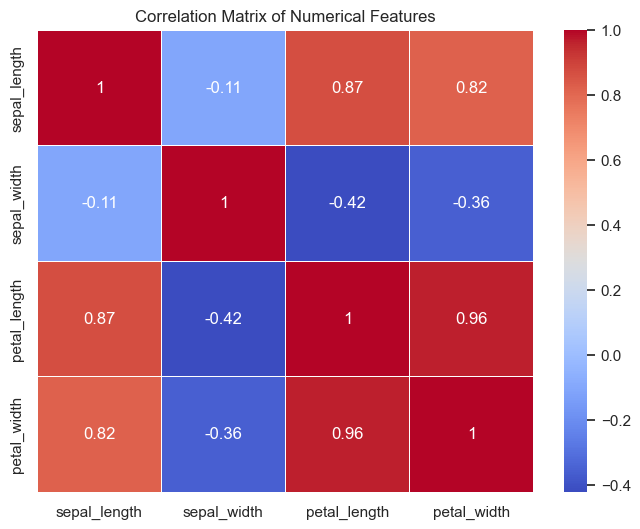

In [17]:

# Compute the correlation matrix for the numerical features
correlation_matrix = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Numerical Features')

# Show the plot
plt.show()


Interpret which features have the strongest correlation and whether it varies significantly between species.

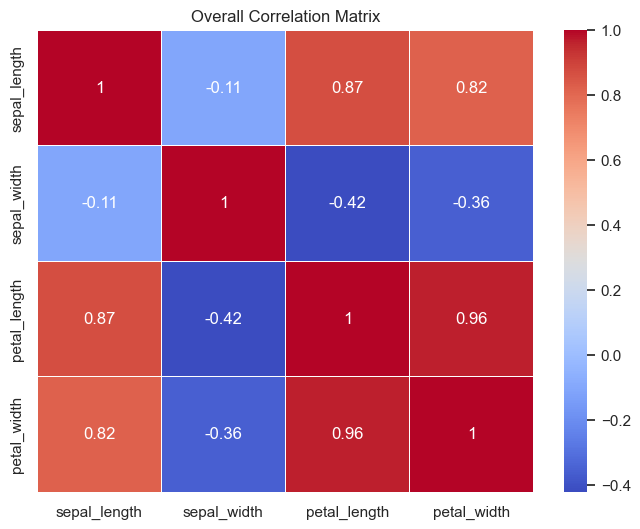

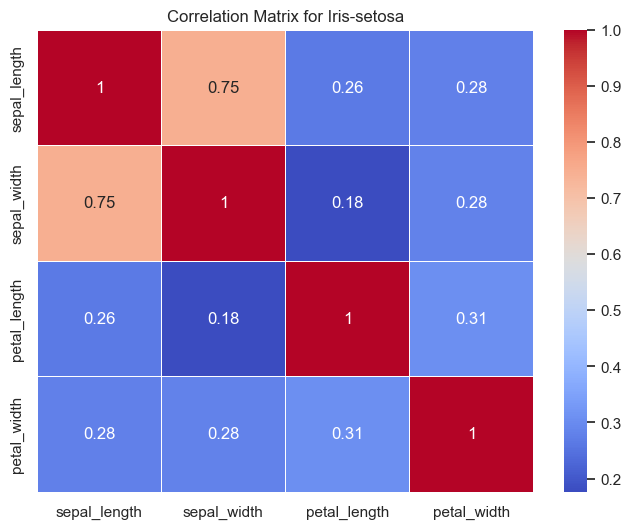

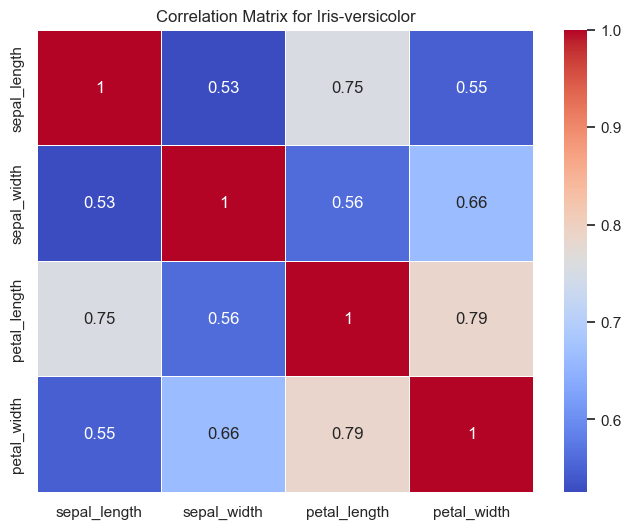

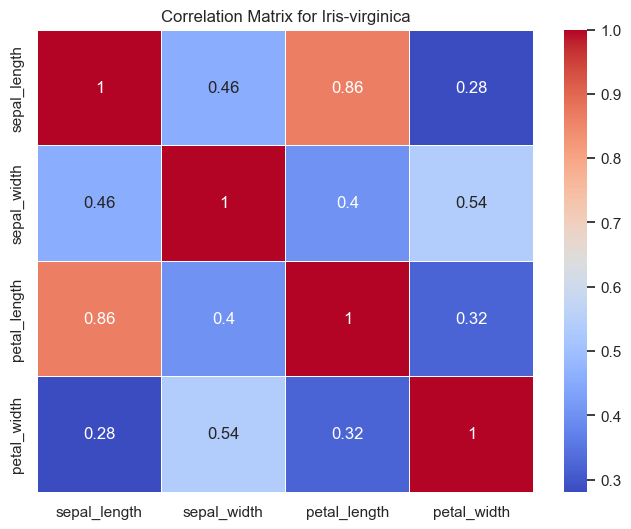

In [18]:

# Compute correlation matrix for the entire dataset
overall_corr = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Display the overall correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(overall_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Overall Correlation Matrix')
plt.show()

# Compute and display correlation matrices by species
for species in iris_df['species'].unique():
    species_data = iris_df[iris_df['species'] == species]
    species_corr = species_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(species_corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix for {species}')
    plt.show()


# 6. Feature Engineering:

Create new features sepal_ratio (sepal_length/sepal_width) and petal_ratio(petal_length/petal_width).

In [19]:
# Create new features: sepal_ratio and petal_ratio
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Display the first few rows to confirm the new features
print(iris_df[['sepal_ratio', 'petal_ratio']].head())

   sepal_ratio  petal_ratio
0    -0.872705     1.021551
1     9.147238     1.021551
2    -4.100517     1.064861
3   -14.152993     0.978240
4    -0.808770     1.021551


Analyze which species has the largest average sepal_ratio and petal_ratio.

In [20]:

# Create new features: sepal_ratio and petal_ratio
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Group by species and calculate the mean of sepal_ratio and petal_ratio
average_ratios = iris_df.groupby('species')[['sepal_ratio', 'petal_ratio']].mean()

# Display the result
print(average_ratios)


                 sepal_ratio  petal_ratio
species                                  
Iris-setosa        -0.644306     1.051836
Iris-versicolor     0.516253    16.728907
Iris-virginica     -1.123662     1.056293


Visualize the distribution of these new features using histograms, separated by species.

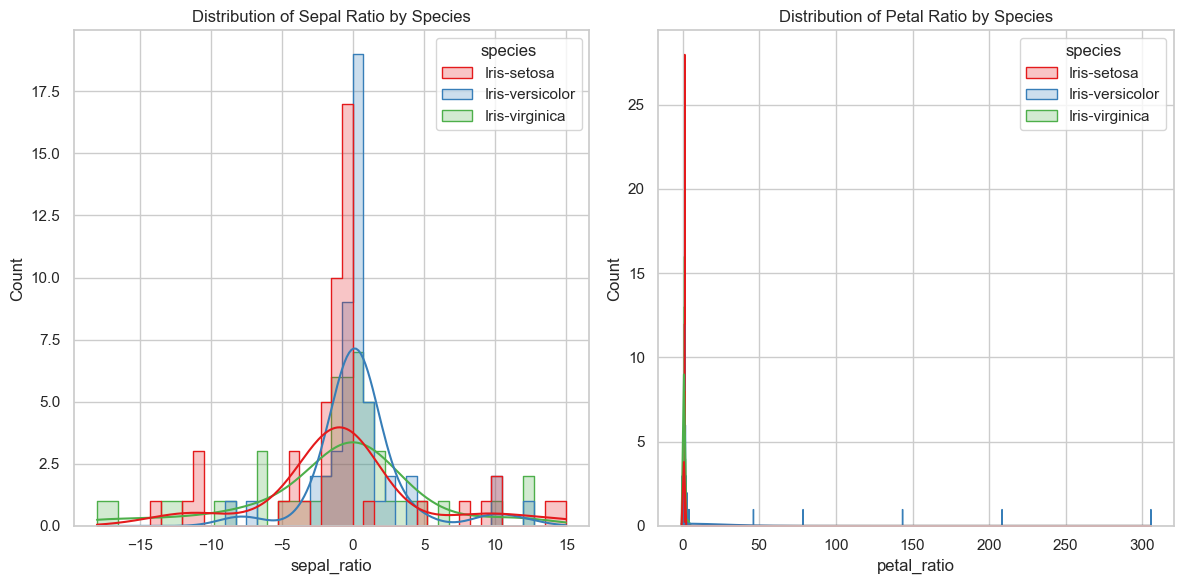

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a histogram for sepal_ratio, separated by species
plt.subplot(1, 2, 1)
sns.histplot(data=iris_df, x='sepal_ratio', hue='species', kde=True, palette='Set1', element='step')
plt.title('Distribution of Sepal Ratio by Species')

# Create a histogram for petal_ratio, separated by species
plt.subplot(1, 2, 2)
sns.histplot(data=iris_df, x='petal_ratio', hue='species', kde=True, palette='Set1', element='step')
plt.title('Distribution of Petal Ratio by Species')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# 7. Dimensionality Reduction:

Apply Principle Component Analysis (PCA) on the standardized data and reduce it to 2 dimensions.

In [22]:

# Select only numerical features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA result and include species for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris_df['species']

# Display the first few rows of the PCA result
print(pca_df.head())


        PC1       PC2      species
0 -2.264542  0.505704  Iris-setosa
1 -2.086426 -0.655405  Iris-setosa
2 -2.367950 -0.318477  Iris-setosa
3 -2.304197 -0.575368  Iris-setosa
4 -2.388777  0.674767  Iris-setosa


Plot a scatter plot of the two principle components, color-coded by species.

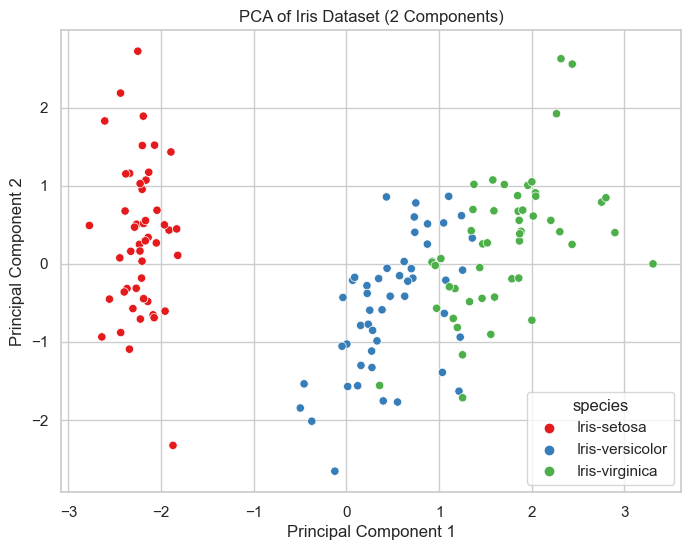

In [23]:

# Create a scatter plot for the two principal components, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')

# Add title and labels
plt.title('PCA of Iris Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


Interpreted how well PCA separates the species.

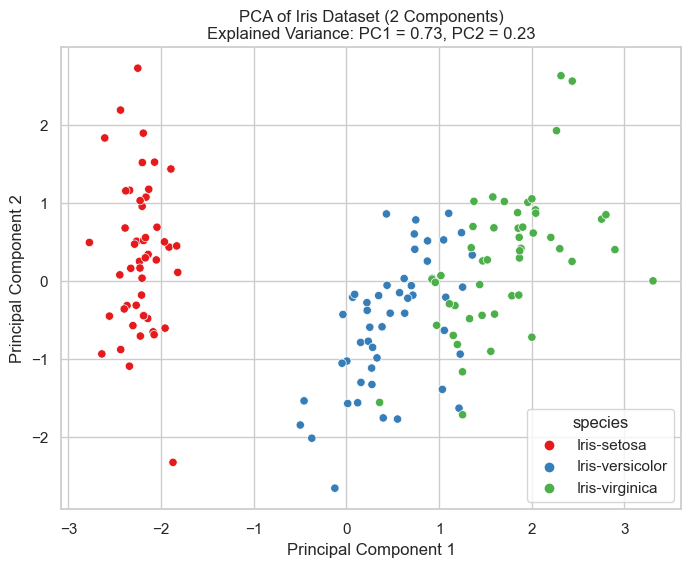

Explained variance by PC1: 0.73
Explained variance by PC2: 0.23


In [24]:

# Apply PCA to reduce the data to 2 dimensions and calculate explained variance
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA result and include species
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = iris_df['species']

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the scatter plot of the two principal components, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df, palette='Set1')

# Add title and labels
plt.title(f'PCA of Iris Dataset (2 Components)\nExplained Variance: PC1 = {explained_variance[0]:.2f}, PC2 = {explained_variance[1]:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

# Print explained variance ratio for interpretation
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")


# 8. Clustering Analysis:

Use the K-Means algorithm to cluster the data into 3 cluster (assuming you don't know the species labels).

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


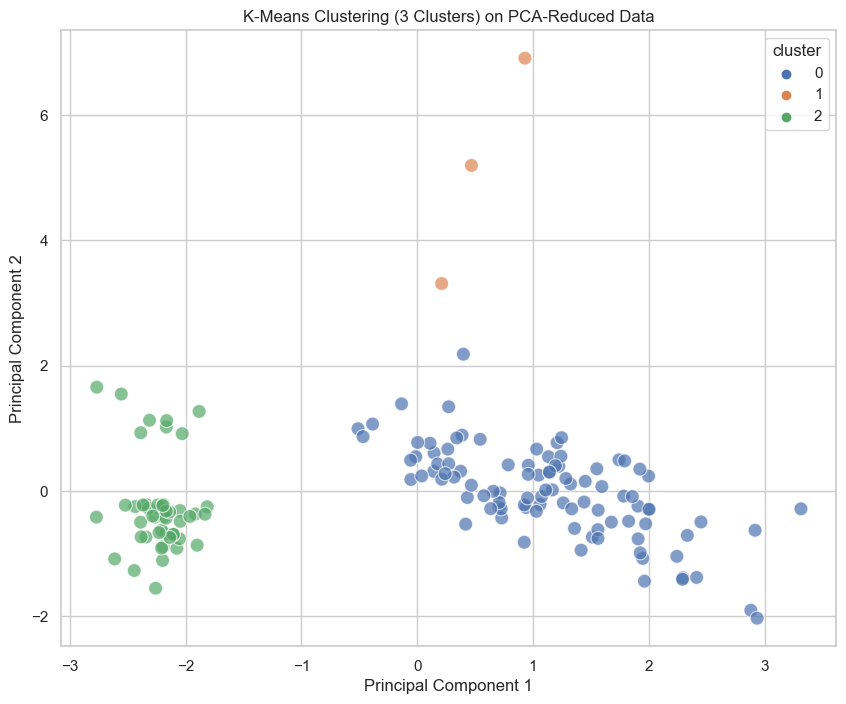

In [29]:

# Create new features
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Select numerical features and standardize them
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = iris_df[features]
X_standardized = StandardScaler().fit_transform(X)

# Apply K-Means clustering to create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(X_standardized)

# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = iris_df['cluster']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot for the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette="deep", s=100, alpha=0.7, edgecolor='w')

# Set title and labels
plt.title('K-Means Clustering (3 Clusters) on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the plot
plt.show()


Compare the K-Means clusters with the actual species labels using a confusion matrix and calculate the clustering accuracy.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


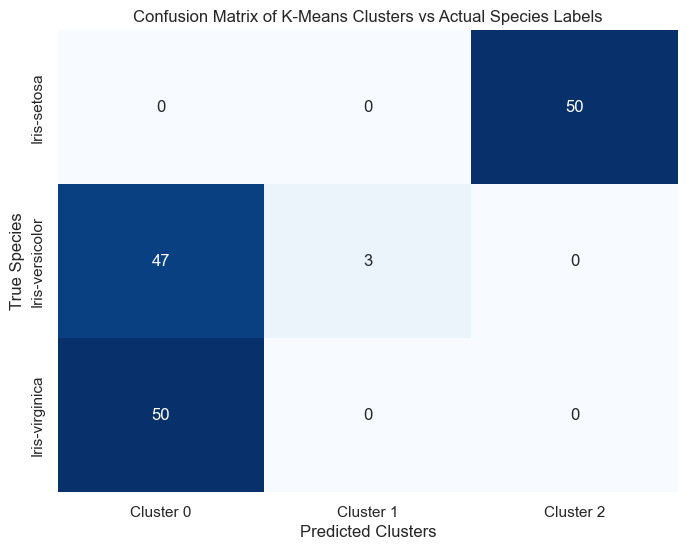

Clustering Accuracy: 0.69


In [33]:

# Create new features
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Select numerical features and standardize them
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = iris_df[features]
X_standardized = StandardScaler().fit_transform(X)

# Apply K-Means clustering to create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(X_standardized)

# Convert species labels to numeric
label_mapping = {label: idx for idx, label in enumerate(iris_df['species'].unique())}
iris_df['species_numeric'] = iris_df['species'].map(label_mapping)

# Compute confusion matrix
conf_matrix = confusion_matrix(iris_df['species_numeric'], iris_df['cluster'])

# Display confusion matrix
df_conf_matrix = pd.DataFrame(conf_matrix, index=label_mapping.keys(), columns=[f'Cluster {i}' for i in range(3)])
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of K-Means Clusters vs Actual Species Labels')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Species')
plt.show()

# Function to find the majority vote for each cluster
def majority_vote(cluster_labels, true_labels):
    clusters = np.unique(cluster_labels)
    cluster_to_species = {}
    for cluster in clusters:
        # Get the species for the current cluster
        species = true_labels[cluster_labels == cluster]
        # Find the most common species
        most_common_species = np.bincount(species).argmax()
        cluster_to_species[cluster] = most_common_species
    return cluster_to_species

# Convert species to numeric array for voting
true_labels_array = iris_df['species_numeric'].values

# Get the cluster to species mapping
cluster_to_species = majority_vote(iris_df['cluster'], true_labels_array)

# Predict species based on the cluster to species mapping
predicted_labels = np.array([cluster_to_species[cluster] for cluster in iris_df['cluster']])

# Calculate clustering accuracy
accuracy = accuracy_score(iris_df['species_numeric'], predicted_labels)

print(f'Clustering Accuracy: {accuracy:.2f}')


Plot the cluster and centroid on a scatter plot of the first two principal components.

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


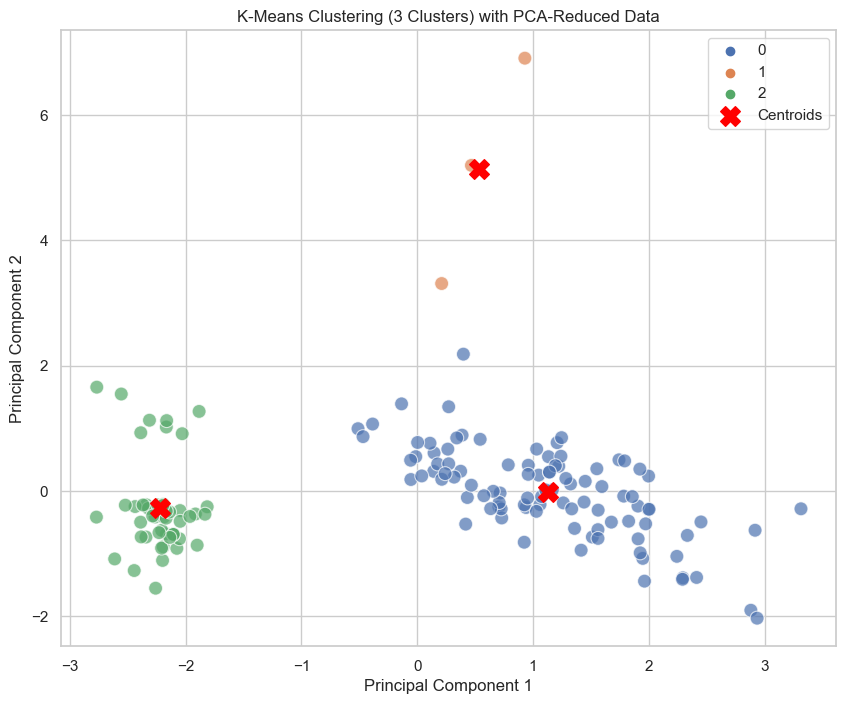

In [38]:

# Create new features
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Select numerical features and standardize them
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = iris_df[features]
X_standardized = StandardScaler().fit_transform(X)

# Apply K-Means clustering to create 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(X_standardized)

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = iris_df['cluster']

# Retrieve cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a scatter plot for the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette="deep", s=100, alpha=0.7, edgecolor='w')

# Plot the centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label='Centroids')

# Set title and labels
plt.title('K-Means Clustering (3 Clusters) with PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Display the plot
plt.show()


# 9. Classification Model:

Train a Random Forest Classifier to predict the species of the flowers. 

Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



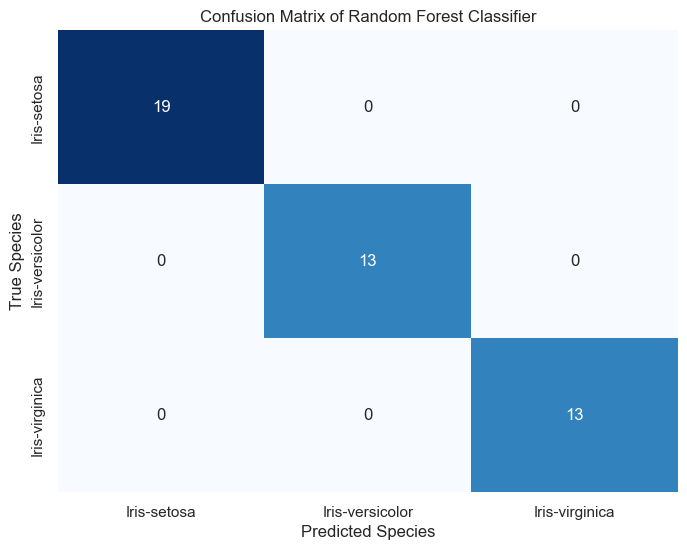

In [43]:

# Create new features
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Select features and target
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = iris_df[features]
y = iris_df['species']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
df_conf_matrix = pd.DataFrame(conf_matrix, index=iris_df['species'].unique(), columns=iris_df['species'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()


split the data into 80% training and 20% testing sets


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



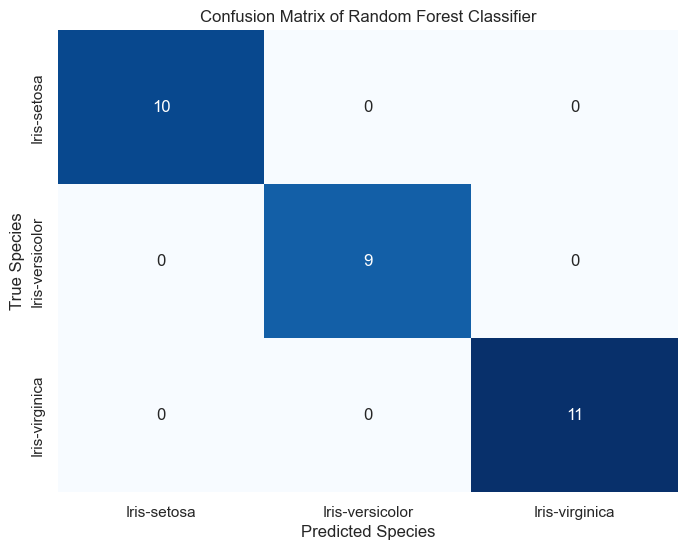

In [45]:

# Load the dataset into a DataFrame
iris_df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Create new features
iris_df['sepal_ratio'] = iris_df['sepal_length'] / iris_df['sepal_width']
iris_df['petal_ratio'] = iris_df['petal_length'] / iris_df['petal_width']

# Select features and target
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = iris_df[features]
y = iris_df['species']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
df_conf_matrix = pd.DataFrame(conf_matrix, index=df['species'].unique(), columns=df['species'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()


evaluate the model by calculating accuracy, precision,recall and the F1 score


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


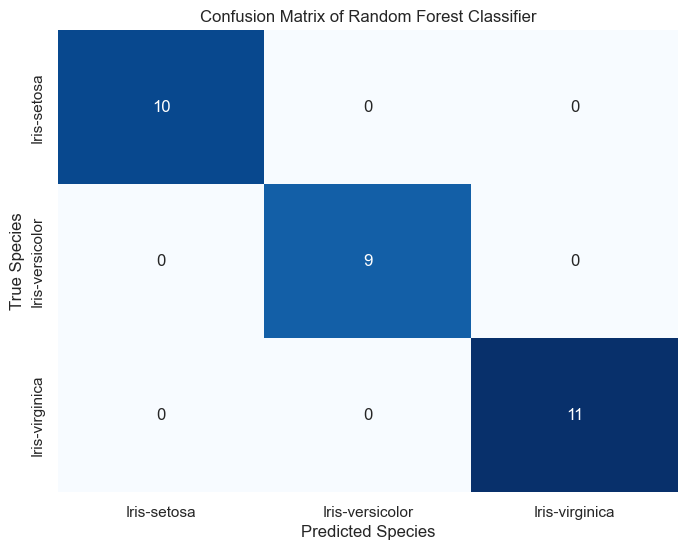

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [52]:
# Load the dataset into a DataFrame
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Create new features
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
df['petal_ratio'] = df['petal_length'] / df['petal_width']

# Select features and target
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = df[features]
y = df['species']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
df_conf_matrix = pd.DataFrame(conf_matrix, index=df['species'].unique(), columns=df['species'].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(df_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


plot the feature importance based on the Random Forest model

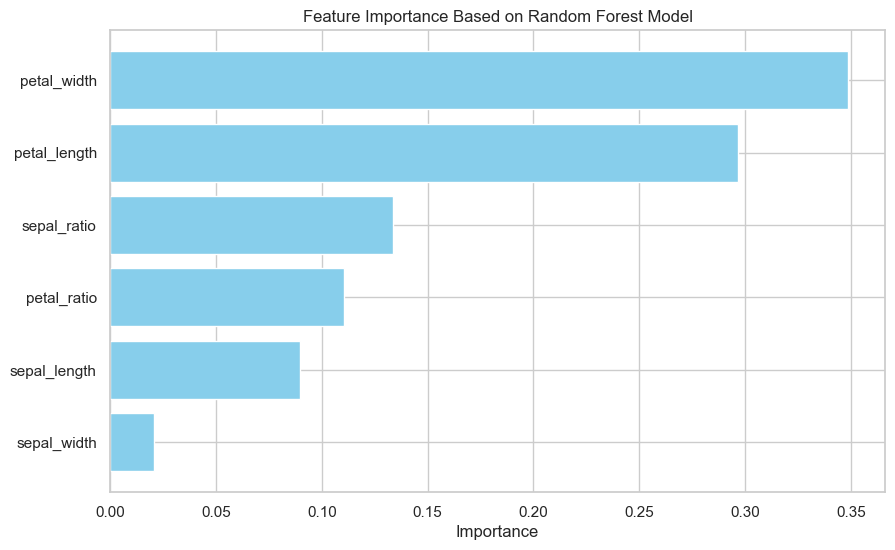

In [53]:
# Load the dataset into a DataFrame
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Create new features
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
df['petal_ratio'] = df['petal_length'] / df['petal_width']

# Select features and target
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_ratio', 'petal_ratio']
X = df[features]
y = df['species']

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Based on Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
